<a href="https://colab.research.google.com/github/skhabiri/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/module2-Train/LS_DS17_422_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 4, Sprint 2, Module 2*

---

# Train (Prepare)
__*Neural Network Foundations*__

## Learning Objectives
* <a href="#p1">Part 1</a>: Student should be able to explain the intuition behind backpropagation and gradient descent
* <a href="#p2">Part 2</a>: Student should be able to discuss the importance of batch size
* <a href="#p3">Part 3</a>: Student should be able to discuss the importance of learning rate

## Summary of Yesterday

Yesterday, we learned about some of the principal components of Neural Networks: Neurons, Weights, Activation Functions, and layers (input, output, & hidden). Today, we will reinforce our understanding of those components and introduce the mechanics of training a neural network. Feed-forward neural networks, such as multi-layer perceptrons (MLPs), are almost always trained using some variation of gradient descent where the gradient has been calculated by backpropagation.

  <center><img src="https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks/main/module1-Architect/IMG_0167.jpeg" width=400></center>

- There are three kinds of layers: input, hidden, and output layers.
- Each layer is made up of **n** individual neurons (aka activation units) which have a corresponding weight and bias.
- Signal is passed from layer to layer through a network by:
 - Taking in inputs from the training data (or previous layer)
 - Multiplying each input by its corresponding weight (think arrow/connecting line)
 - Adding a bias to this weighted some of inputs and weights
 - Activating this weighted sum + bias by squishifying it with sigmoid or some other activation function. With a single perceptron with three inputs, calculating the output from the node is done like so:
\begin{align}
 y = sigmoid(\sum(weight_{1}input_{1} + weight_{2}input_{2} + weight_{3}input_{3}) + bias)
\end{align}
 - this final activated value is the signal that gets passed onto the next layer of the network.
 

## Training a Neural Network: *Formal Summary*

0. Pick a network architecture
   - No. of input units = No. of features
   - No. of output units = Number of Classes (or expected targets)
   - Select the number of hidden layers and number of neurons within each hidden layer
1. Randomly initialize weights
2. Implement forward propagation to get $h_{\theta}(x^{(i)})$ for any $x^{(i)}$
3. Implement code to compute a cost function $J(\theta)$
4. Implement backpropagation to compute partial derivatives $\frac{\delta}{\delta\theta_{jk}^{l}}{J(\theta)}$
5. Use gradient descent (or other advanced optimizer) with backpropagation to minimize $J(\theta)$ as a function of parameters $\theta\$
6. Repeat steps 2 - 5 until cost function is 'minimized' or some other stopping criteria is met. One pass over steps 2 - 5 is called an iteration or epoch.

# Backpropagation & Gradient Descent (Learn)
<a id="p1"></a>

## Overview

Backpropagation is short for ["Backwards Propagation of errors"](https://en.wikipedia.org/wiki/Backpropagation) and refers to a specific (rather calculus intensive) algorithm for how weights in a neural network are updated in reverse order at the end of each training epoch. Our purpose today is to demonstrate the backpropagation algorithm on a simple Feedforward Neural Network and in so doing help you get a grasp on the main process. If you want to understand all of the underlying calculus of how the gradients are calculated then you'll need to dive into it yourself, [3Blue1Brown's video is a great starting place](https://www.youtube.com/watch?v=tIeHLnjs5U8). I also highly recommend this Welch Labs series [Neural Networks Demystified](https://www.youtube.com/watch?v=bxe2T-V8XRs) if you want a rapid yet orderly walk through of the main intuitions and math behind the backpropagation algorithm. 

### What is a Gradient?

> In vector calculus, the gradient is a multi-variable generalization of the derivative. 

The gradients that we will deal with today will be vector representations of the derivative of the activation function. 

## Follow Along

In this section, we will again a simple neural network using base TensorFlow. We'll focus on using a __Feed Forward Neural Network__ to predict test scores. 

<center><img src="https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks/main/module1-Architect/IMG_99C94113202D-1.jpeg"width=500></center>

### Generate some Fake Data

In [2]:
import tensorflow as tf

# Imagine that our data is drawn from a linear function
# y = 3.5*hours_studying + 50

TRUE_W = 3.5
TRUE_b = 50.0
NUM_EXAMPLES = 1000

# Default is mean=0 std=1, dtype=float32, a subclass of numpy array!
inputs = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])

outputs = inputs * TRUE_W + TRUE_b + noise

In [3]:
type(inputs)

tensorflow.python.framework.ops.EagerTensor

In [4]:
inputs[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([ 0.7549111 , -0.28800866,  0.87909114,  0.79170066, -0.94794244],
      dtype=float32)>

In [5]:
noise[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([-0.26388767, -1.5379759 , -0.57667124,  0.1533132 ,  1.396816  ],
      dtype=float32)>

In [6]:
outputs[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([52.3783  , 47.453995, 52.50015 , 52.924263, 48.079018],
      dtype=float32)>

### Loss Function
Here we will use Mean Squared Error (MSE), because this is a regression problem. We are trying to predict a continuous target.

In [7]:
def loss(target_y, predicted_y):
  "MSE"
  # Computes the mean of elements across dimensions of a tensor.
  # Computes square of x element-wise.
  return tf.reduce_mean(tf.square(target_y - predicted_y))

### Neural Network Architecture
Lets create a Neural Network class called "Model" to contain this functionality. Note: This is essentially a linear regression whose coefficients are trained by gradient descent. In practice, gradient descent works on much more complex function like the multi-layer networks we constructed yesterday.

In [8]:
dir(tf)

['AggregationMethod',
 'Assert',
 'CriticalSection',
 'DType',
 'DeviceSpec',
 'GradientTape',
 'Graph',
 'IndexedSlices',
 'IndexedSlicesSpec',
 'Module',
 'Operation',
 'OptionalSpec',
 'RaggedTensor',
 'RaggedTensorSpec',
 'RegisterGradient',
 'SparseTensor',
 'SparseTensorSpec',
 'Tensor',
 'TensorArray',
 'TensorArraySpec',
 'TensorShape',
 'TensorSpec',
 'TypeSpec',
 'UnconnectedGradients',
 'Variable',
 'VariableAggregation',
 'VariableSynchronization',
 '_API_MODULE',
 '_LazyLoader',
 '__all__',
 '__builtins__',
 '__cached__',
 '__compiler_version__',
 '__cxx11_abi_flag__',
 '__doc__',
 '__file__',
 '__git_version__',
 '__loader__',
 '__monolithic_build__',
 '__name__',
 '__operators__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_absolute_import',
 '_api',
 '_compat',
 '_current_file_location',
 '_current_module',
 '_distutils',
 '_division',
 '_estimator_module',
 '_fi',
 '_inspect',
 '_ll',
 '_logging',
 '_main_dir',
 '_major_api_version',
 '_module_dir',
 '

In [9]:
# Experiment with tensor operator
w = tf.Variable([[1.], [2.]])
x = tf.constant([[3., 4.]])
# tf.matmul(w, x)
w+x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 5.],
       [5., 6.]], dtype=float32)>

In [10]:
class Model(object):

  def __init__(self):
    self.W = tf.Variable(8.0)
    self.b = tf.Variable(40.0)

  # So, the __init__ method is used when the class is called to initialize the instance, 
  # while the __call__ method allows the class's instance to be called as a function, and returns a value
  def __call__(self, x):
    return self.W * x + self.b

model = Model()

assert model(3.0).numpy() == 64.0

In [11]:
print(type(model))
# W and b are of type tensor
print(type(model(3.0)))

<class '__main__.Model'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [12]:
model(3.0)

<tf.Tensor: shape=(), dtype=float32, numpy=64.0>

In [13]:
model(3.0).numpy()

64.0

### Initial Weights
The initial weights in our model were arbitrary. In practice, weights are initialized randomly. 

In [14]:
loss(outputs, model(inputs))

<tf.Tensor: shape=(), dtype=float32, numpy=116.270515>

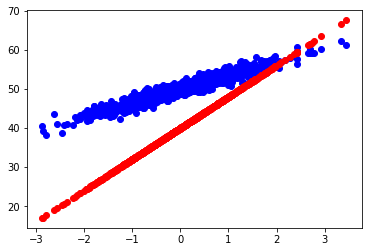

Current loss: 116.270515


In [15]:
import matplotlib.pyplot as plt

# blue is the target
plt.scatter(inputs, outputs, c='b')
# red is the prediction. In fact red is the image of blue on the red line
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: %1.6f' % loss(outputs, model(inputs)).numpy())

### Update Weights Based on Gradient

> *Assigning blame for bad predictions and delivering justice - repeatedly and a little bit at a time*

You should also know that with neural networks it is common to have gradients that are not convex (like what we saw when we applied gradient descent to linear regression). 

Due to the high complexity of these models and their nonlinearity, it is common for gradient descent to get stuck in a local minimum, but there are ways to combat this:

1) Stochastic Gradient Descent

2) More advanced Gradient-Descent-based "Optimizers" - See Stretch Goals on assignment.

In [16]:
 def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t: 
    # recording :
    current_loss = loss(outputs, model(inputs))
  #takes the gradient of current_loss vs W and b, dw is actually d(Loss)/dW
  dW, db = t.gradient(current_loss, [model.W, model.b])
  # W = W - learning_rate * dW
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)
  return current_loss

### Train the Network

In [17]:
model = Model()

# Store Some history of weights
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  # current_loss is the same as train return value
  current_loss = loss(outputs, model(inputs))

  train(model, inputs, outputs, learning_rate=0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f loss=%2.5f' % (epoch, Ws[-1], bs[-1], current_loss))

Epoch  0: W=8.00 b=40.00 loss=116.27052
Epoch  1: W=7.21 b=41.96 loss=76.01251
Epoch  2: W=6.55 b=43.53 loss=49.82730
Epoch  3: W=6.01 b=44.79 loss=32.79016
Epoch  4: W=5.57 b=45.81 loss=21.70173
Epoch  5: W=5.20 b=46.62 loss=14.48280
Epoch  6: W=4.90 b=47.28 loss=9.78167
Epoch  7: W=4.66 b=47.81 loss=6.71931
Epoch  8: W=4.45 b=48.23 loss=4.72393
Epoch  9: W=4.29 b=48.57 loss=3.42342


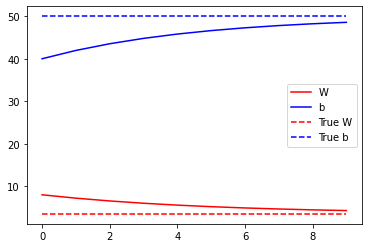

In [18]:
import matplotlib.pyplot as plt

plt.plot(epochs, Ws, 'r', epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()

## Challenge

In the module project, you will be asked to explain the logic of backpropagation and gradient descent.

# Batch Size (Learn)

## Overview

The What - Stochastic Gradient Descent calculates an approximation of the gradient over the entire dataset by reviewing the predictions of a random sample. 

The Why - *Speed*. Calculating the gradient over the entire dataset is extremely expensive computationally. 

### Batch Size
Batches are the number of observations our model is shown to make predictions and update the weights. Batches are selected randomly during epoch. All observations are considered when passing thru an epoch at some point.

* Smaller Batch = Slower Run Time (but maybe more accurate results)
* Default Batch = Balance between speed and accuracy
* Large Batch = Very fast, but not nearly as accurate.

### Baseline Model

In [19]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the colors between 0 and 1
X_train = X_train / 255.
X_test = X_test / 255.

# it's 28pixels * 28 pixels
X_train = X_train.reshape((60000, 784))
X_test = X_test.reshape((10000, 784))

11493376/11490434 [==============================] - 0s 0us/step


In [20]:
# Our Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def create_model(lr=.01):
  """
  Stochastic Gradient Descent SGD optimizer
  784+1 * 32+1 * 32+1 * 10
  """
  opt = SGD(learning_rate=lr)

  model = Sequential(
      [
      #  784 inputs + 1 bias connect to 32 1st layer Hiddent neurons
       Dense(32, activation='relu', input_dim=784),
      #  32 1st-H-Neurons + 1 bias connected to 32 2'nd layer H-Neurons
       Dense(32, activation='relu'),
      #  32 2nd-H-neurons connect to 10 Output neurons
       Dense(10, activation='softmax')       
      ]
    )
  # sparse_categorical_crossentropy is good for multilable classification
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [21]:
mnist_model = create_model()
dir(mnist_model)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_cast_single_input',
 '_check_call_args',
 '_checkpoint_dependencies',
 '_clear_los

In [22]:
25120/785
1056/33

32.0

In [23]:
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


## Follow Along
Let's run a series of experiments for a default, small, and large batch size.

### Default
Batch Size is 32

> *Seems like the entire X is divided into batches of size n and the NN is trained on each batch of n samples and W, b get's updated at the end of each batch of n. Once all batches in a training dataset are trained the epoch counter goes up and we create another set of batches randomly and exclusively (like Kfold) and retrain based on each of the new batches again. For stochastic GD, batch size is 1 and the accuracy of each update is low but number of updates are maximum, as the # of back propagation is maximum = "one back-propagation for each batch of each epoch.". That resuls in long computing time for each epoch. The training trend is very noise since the updates are done based on individual samples. 
In batch size GD, the number of batches is one and the size of the batch is equal to training set. Hence the epoch looks at the same entire training dataset repeatedly and make an update on every epoch run. Less noisy and minimum number of back propagation = one back-propagation per epoch. Hence runtime is faster per epoch. However need a large memory to process the entire dataset in one shot.*

In [24]:
mnist_model_32 = create_model()

bt_default = mnist_model_32.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=25,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7634 - accuracy: 0.7786 - val_loss: 0.3650 - val_accuracy: 0.8956
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3394 - accuracy: 0.9017 - val_loss: 0.2962 - val_accuracy: 0.9164
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2871 - accuracy: 0.9162 - val_loss: 0.2577 - val_accuracy: 0.9262
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2558 - accuracy: 0.9263 - val_loss: 0.2377 - val_accuracy: 0.9321
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2314 - accuracy: 0.9338 - val_loss: 0.2160 - val_accuracy: 0.9381
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2112 - accuracy: 0.9399 - val_loss: 0.2062 - val_accuracy: 0.9403
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1947 - accuracy: 0.9439 - val_loss: 0.1870 - val_accuracy:

### Small Batch Size
Batch Size is 8

In [25]:
mnist_model_8 = create_model()

bt_small = mnist_model_8.fit(X_train, y_train,
                             # Hyperparameters!
                             epochs=25,
                             batch_size=8,
                             validation_data=(X_test, y_test))

Epoch 1/25
7500/7500 [==============================] - 14s 2ms/step - loss: 0.4425 - accuracy: 0.8716 - val_loss: 0.2297 - val_accuracy: 0.9336
Epoch 2/25
7500/7500 [==============================] - 13s 2ms/step - loss: 0.2111 - accuracy: 0.9374 - val_loss: 0.1824 - val_accuracy: 0.9443
Epoch 3/25
7500/7500 [==============================] - 13s 2ms/step - loss: 0.1659 - accuracy: 0.9514 - val_loss: 0.1520 - val_accuracy: 0.9540
Epoch 4/25
7500/7500 [==============================] - 13s 2ms/step - loss: 0.1387 - accuracy: 0.9599 - val_loss: 0.1380 - val_accuracy: 0.9591
Epoch 5/25
7500/7500 [==============================] - 13s 2ms/step - loss: 0.1199 - accuracy: 0.9648 - val_loss: 0.1240 - val_accuracy: 0.9626
Epoch 6/25
7500/7500 [==============================] - 15s 2ms/step - loss: 0.1065 - accuracy: 0.9682 - val_loss: 0.1195 - val_accuracy: 0.9623
Epoch 7/25
7500/7500 [==============================] - 14s 2ms/step - loss: 0.0970 - accuracy: 0.9708 - val_loss: 0.1089 - val_ac

### Large Batch Size
Batch Size is 512

In [26]:
mnist_model_512 = create_model()

bt_large = mnist_model_512.fit(X_train, y_train,
                               # Hyperparameters!
                               epochs=25,
                               batch_size=512,
                               validation_data=(X_test, y_test))

Epoch 1/25
118/118 [==============================] - 0s 4ms/step - loss: 2.2326 - accuracy: 0.2042 - val_loss: 2.0603 - val_accuracy: 0.3651
Epoch 2/25
118/118 [==============================] - 0s 3ms/step - loss: 1.8705 - accuracy: 0.4556 - val_loss: 1.6389 - val_accuracy: 0.5518
Epoch 3/25
118/118 [==============================] - 0s 3ms/step - loss: 1.4554 - accuracy: 0.6074 - val_loss: 1.2456 - val_accuracy: 0.6696
Epoch 4/25
118/118 [==============================] - 0s 3ms/step - loss: 1.1114 - accuracy: 0.7151 - val_loss: 0.9531 - val_accuracy: 0.7605
Epoch 5/25
118/118 [==============================] - 0s 3ms/step - loss: 0.8733 - accuracy: 0.7861 - val_loss: 0.7651 - val_accuracy: 0.8052
Epoch 6/25
118/118 [==============================] - 0s 3ms/step - loss: 0.7249 - accuracy: 0.8146 - val_loss: 0.6494 - val_accuracy: 0.8263
Epoch 7/25
118/118 [==============================] - 0s 3ms/step - loss: 0.6315 - accuracy: 0.8317 - val_loss: 0.5737 - val_accuracy: 0.8442
Epoch 

### Visualization of Results

In [28]:
bt_large.history

{'accuracy': [0.20424999296665192,
  0.45561665296554565,
  0.6074166893959045,
  0.7151166796684265,
  0.7861499786376953,
  0.814633309841156,
  0.8317166566848755,
  0.8447499871253967,
  0.8554999828338623,
  0.864216685295105,
  0.8712166547775269,
  0.8766833543777466,
  0.8813833594322205,
  0.8853166699409485,
  0.8891333341598511,
  0.8920000195503235,
  0.8944500088691711,
  0.8966000080108643,
  0.8987833261489868,
  0.9004999995231628,
  0.9020000100135803,
  0.9039999842643738,
  0.9046333432197571,
  0.9058333039283752,
  0.9077333211898804],
 'loss': [2.232565402984619,
  1.870497226715088,
  1.455391764640808,
  1.111449956893921,
  0.8733290433883667,
  0.7248554825782776,
  0.6315497756004333,
  0.5690358877182007,
  0.5240890979766846,
  0.49016451835632324,
  0.4633370041847229,
  0.4416573643684387,
  0.42356178164482117,
  0.40833359956741333,
  0.3952297568321228,
  0.38385534286499023,
  0.37392398715019226,
  0.3651430606842041,
  0.35733479261398315,
  0.35009

In [30]:
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [31]:
pd.DataFrame.from_dict(bt_large.history)

,loss,accuracy,val_loss,val_accuracy
0,2.232565,0.204250,2.060334,0.3651
1,1.870497,0.455617,1.638898,0.5518
2,1.455392,0.607417,1.245569,0.6696
3,1.111450,0.715117,0.953111,0.7605
4,0.873329,0.786150,0.765143,0.8052
5,0.724855,0.814633,0.649416,0.8263
6,0.631550,0.831717,0.573666,0.8442
7,0.569036,0.844750,0.522705,0.8549
8,0.524089,0.855500,0.484989,0.8649
9,0.490165,0.864217,0.455043,0.8713


In [32]:
batch_sizes = []

for exp, result in zip([bt_default, bt_small, bt_large], ["32_", "8_", "512_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result

  batch_sizes.append(df)

In [33]:
batch_sizes

[        loss  accuracy  val_loss  val_accuracy  epoch Batch Size
 0   0.763448  0.778550  0.364958        0.8956      0        32_
 1   0.339391  0.901717  0.296171        0.9164      1        32_
 2   0.287079  0.916167  0.257721        0.9262      2        32_
 3   0.255788  0.926300  0.237651        0.9321      3        32_
 4   0.231425  0.933817  0.216042        0.9381      4        32_
 5   0.211153  0.939917  0.206250        0.9403      5        32_
 6   0.194745  0.943883  0.186994        0.9443      6        32_
 7   0.180743  0.948217  0.176439        0.9477      7        32_
 8   0.169312  0.951067  0.168900        0.9516      8        32_
 9   0.159450  0.953850  0.161378        0.9508      9        32_
 10  0.150293  0.956433  0.155531        0.9526     10        32_
 11  0.142816  0.958933  0.148105        0.9548     11        32_
 12  0.136631  0.961200  0.147992        0.9559     12        32_
 13  0.129891  0.962367  0.139977        0.9579     13        32_
 14  0.124

In [34]:
pd.concat(batch_sizes)

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,0.763448,0.778550,0.364958,0.8956,0,32_
1,0.339391,0.901717,0.296171,0.9164,1,32_
2,0.287079,0.916167,0.257721,0.9262,2,32_
3,0.255788,0.926300,0.237651,0.9321,3,32_
4,0.231425,0.933817,0.216042,0.9381,4,32_
...,...,...,...,...,...,...
20,0.343867,0.902000,0.327648,0.9044,20,512_
21,0.338000,0.904000,0.323396,0.9065,21,512_
22,0.332677,0.904633,0.319041,0.9070,22,512_
23,0.327594,0.905833,0.314065,0.9095,23,512_


In [37]:
pd.concat(batch_sizes).dtypes

loss            float64
accuracy        float64
val_loss        float64
val_accuracy    float64
epoch             int64
Batch Size       object
dtype: object

In [38]:
df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,0.763448,0.778550,0.364958,0.8956,0,32_
1,0.339391,0.901717,0.296171,0.9164,1,32_
2,0.287079,0.916167,0.257721,0.9262,2,32_
3,0.255788,0.926300,0.237651,0.9321,3,32_
4,0.231425,0.933817,0.216042,0.9381,4,32_


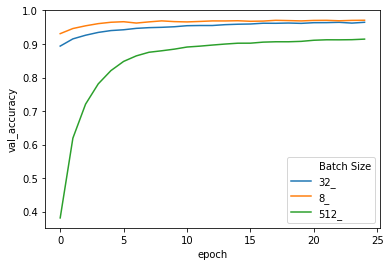

In [ ]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

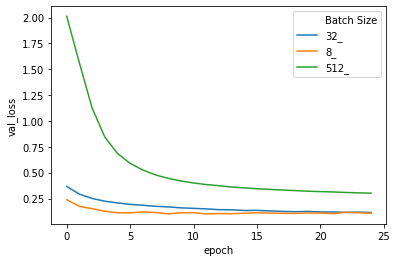

In [ ]:
sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=df);

## Challenge

You will be expected to experiment with batch size on today's assignment.

# Learning Rate (Learn)

## Overview

Learning Rate controls the size of the update to our weights that the optimization algorithm makes. VERY IMPORTANT hyperparameter.

* Too high of a learning rate causes unstable results
* Too Low of a learning rate the model will underfit
* Goldilocks parameters - it needs be "just right"
* Scale of 0-1

## Follow Along

Same experiment with Batch but different learning rates:
* High Learning = .75
* Default Learning = .01
* Low Learning Rate = .0001

### Default Learning Rate

In [45]:
# Running with 10 for time, feel free to rerun with 25 to make nicer plots
lr_default = create_model().fit(X_train, y_train,
                                epochs=10,
                                validation_data=(X_test,y_test)
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7925 - accuracy: 0.7731 - val_loss: 0.3688 - val_accuracy: 0.8935
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3340 - accuracy: 0.9048 - val_loss: 0.2912 - val_accuracy: 0.9169
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2805 - accuracy: 0.9191 - val_loss: 0.2597 - val_accuracy: 0.9237
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2501 - accuracy: 0.9275 - val_loss: 0.2307 - val_accuracy: 0.9319
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2286 - accuracy: 0.9342 - val_loss: 0.2123 - val_accuracy: 0.9385
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2116 - accuracy: 0.9391 - val_loss: 0.2007 - val_accuracy: 0.9411
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1972 - accuracy: 0.9440 - val_loss: 0.1922 - val_accuracy:

### High Learning Rate

In [46]:
lr_high = create_model(lr=.75).fit(X_train, y_train,
                                epochs=10,
                                validation_data=(X_test,y_test)
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7055 - accuracy: 0.7849 - val_loss: 0.3875 - val_accuracy: 0.8964
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4386 - accuracy: 0.8876 - val_loss: 0.4881 - val_accuracy: 0.8961
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4787 - accuracy: 0.8794 - val_loss: 0.5768 - val_accuracy: 0.8317
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6973 - accuracy: 0.7759 - val_loss: 0.5933 - val_accuracy: 0.8116
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6729 - accuracy: 0.7793 - val_loss: 0.7754 - val_accuracy: 0.7087
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7595 - accuracy: 0.7479 - val_loss: 1.8094 - val_accuracy: 0.6227
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6700 - accuracy: 0.7911 - val_loss: 0.7306 - val_accuracy:

### Low Learning Rate

In [47]:
lr_low = create_model(lr=.0001).fit(X_train, y_train,
                                epochs=10,
                                validation_data=(X_test,y_test)
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2509 - accuracy: 0.1620 - val_loss: 2.2099 - val_accuracy: 0.1994
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1764 - accuracy: 0.2207 - val_loss: 2.1322 - val_accuracy: 0.2607
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0966 - accuracy: 0.2863 - val_loss: 2.0472 - val_accuracy: 0.3302
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0105 - accuracy: 0.3523 - val_loss: 1.9570 - val_accuracy: 0.3963
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9210 - accuracy: 0.4186 - val_loss: 1.8638 - val_accuracy: 0.4604
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8285 - accuracy: 0.4786 - val_loss: 1.7681 - val_accuracy: 0.5148
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7341 - accuracy: 0.5309 - val_loss: 1.6713 - val_accuracy:

### Visualization of Results

In [48]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([lr_default, lr_low, lr_high], [".01_", ".0001_", ".75_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Learning Rate'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,0.792472,0.773133,0.368822,0.8935,0,.01_
1,0.333966,0.904800,0.291172,0.9169,1,.01_
2,0.280522,0.919150,0.259674,0.9237,2,.01_
3,0.250080,0.927450,0.230655,0.9319,3,.01_
4,0.228590,0.934250,0.212264,0.9385,4,.01_


> *Large learning rate cannot converge.

Too small learning rate need lots of epochs to get to high accuracy, and it's slow*

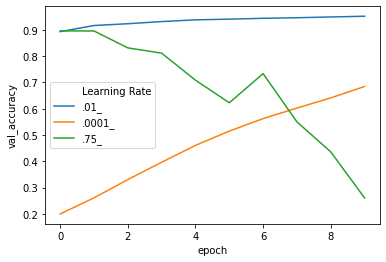

In [49]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

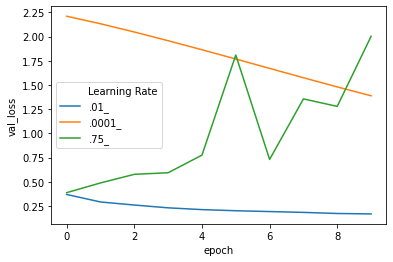

In [50]:
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df);

## Challenge

You will be expected to experiment with different learning rates today.

---